In [13]:
# block 1: import all important libraries.

%matplotlib inline
from netCDF4 import Dataset
from netCDF4 import num2date
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
import pandas as pd
import numpy as np
import numpy.ma as ma
from math import sqrt 

In [14]:
# block 2: Import the used data file and create a variable with the data in the file.

data = "/home/z3525831/Data/IMOS_ANMN-NRS_AETVZ_20120325T002056Z_SEQ200-SubSurface_FV01_SEQ200-SubSurface-120325-Workhorse-ADCP-110_END-20130606T202300Z_C-20131119T020203Z.nc"
ADCP200 = Dataset(data) 

In [15]:
# block 3: Extracting the U/V/lat/long/time/H_B_S/ from the import file and assigns them to a variable.
 
LAT = ADCP200.variables['LATITUDE']
LON = ADCP200.variables['LONGITUDE']
TIMES = ADCP200.variables['TIME']
DEPTH = ADCP200.variables['DEPTH']
V = ADCP200.variables['VCUR']
U = ADCP200.variables['UCUR']
W = ADCP200.variables['WCUR']
Wheight = ADCP200.variables['HEIGHT_ABOVE_SENSOR']

In [16]:
#block 4: Convert the ADCP time serie dataset (Matlab to python time serie: yyyy/mm/dd hh/mm/ss).

units = ADCP200.variables['TIME'].units
calendar = ADCP200.variables['TIME'].calendar
times = num2date(ADCP200.variables['TIME'][:], units=units, calendar=calendar)

In [17]:
#block 5: Creat variable with ADCP dataset.

dph = DEPTH[:,0,0]
latData =  LAT[:]      
lonData = LON[:]       
Wcolumn = Wheight[:]   
data_u = U [:,:,:,:]
data_v = V [:,:,:,:]
v2d = data_v[:,:,0,0]
v1d = v2d
u2d = data_u[:,:,0,0]

In [19]:
#block 6: reshape the depth of the mooring(dph) and the depth above the sensor(Wcolumn) for have the same shape.

dph14=np.kron(np.ones((14,1)),dph) # repeated the dph 14 times to match size of v2d.
Wtime=np.kron(np.ones((20832,1)),Wcolumn)

In [21]:
#The difference after the reshape :
#before
np.shape(Wcolumn), np.shape(dph),

((14,), (20832,))

In [22]:
#after
np.shape(dph14),np.shape(Wtime)

((14, 20832), (20832, 14))

In [29]:
#block 7: Creation of the real depth variable.

DepthReal = dph14-Wtime.T
np.shape(DepthReal)

(14, 20832)

(<matplotlib.collections.PolyCollection at 0x7f06415915f8>,
 <matplotlib.colorbar.Colorbar at 0x7f062c113ac8>)

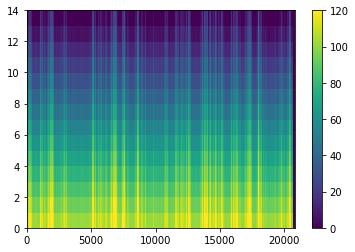

In [28]:
#block 8: Plot the variation of the mooring in time.

plt.pcolor(DepthReal, vmin=0, vmax=120), plt.colorbar()

In [30]:
#block 9: Used loop command ("for") for creat a variable with the mean speed for each depth (every 10m).

Spresult = [ ]
for i in range(0,100,10):
   
    vi= v2d[np.where((DepthReal.T > i) & (DepthReal.T < i+10))]  
    print(np.shape(vi))
    print(np.mean(vi))
    #print(np.std(vi)) 
    Spresult.append(( np.mean(vi)))

(17726,)
-0.10050510715793919
(22439,)
-0.27968486093144335
(29339,)
-0.4579780775512904
(25346,)
-0.6262940581048898
(24341,)
-0.6473039073759522
(24503,)
-0.6163434203075259
(29455,)
-0.493083793001375
(25346,)
-0.5235101661751361
(24341,)
-0.49380384333915367
(24503,)
-0.4371348352940576


In [31]:
#Shape of the new variable
np.shape(Spresult), Spresult

((10,),
 [-0.10050510715793919,
  -0.27968486093144335,
  -0.4579780775512904,
  -0.6262940581048898,
  -0.6473039073759522,
  -0.6163434203075259,
  -0.493083793001375,
  -0.5235101661751361,
  -0.49380384333915367,
  -0.4371348352940576])

In [ ]:
#block 10: Creat a variable with the desired depth step.

depthBin = np.array([5,15,25,35,45,55,65,75,85,95])

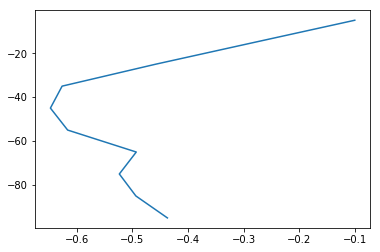

In [32]:
#block 11: Plot the mean velocity for all the water column.

plt.plot(Spresult,-depthBin)